In [24]:
using Revise
using Bilevel

using RigidBodyDynamics
using MeshCatMechanisms
using MeshCat
using ForwardDiff
using Plots
using BenchmarkTools
using LinearAlgebra

In [2]:
urdf = joinpath("..", "urdf", "ball.urdf")
mechanism = parse_urdf(Float64, urdf)

floor = findbody(mechanism, "floor")
point = Point3D(default_frame(floor), [0.,0.,0.])
normal = FreeVector3D(default_frame(floor), [0.,0.,1.])
floor_obs = Obstacle(floor, point, normal, :xyz, .5)

obstacles = [floor_obs]
env = Environment(mechanism, urdf, obstacles)
ctrl! = (u,t,x) -> u[:] .= 0.
x0 = MechanismState(mechanism)

MechanismState{Float64, Float64, Float64, …}(…)

# Simulation

In [3]:
q1 = [1., 0., 0., 0., 0., 0., 0.015]
v1 = [0., 0., 0., 1., 0., 0.]
N = 25
# q1 = [1., 0., 0., 0., 0., 0., 0.]
# v1 = [0., 0., 0., 1., 0., 0.]
# N = 10
Δt = .01

sim_data_indirect = get_sim_data_indirect(mechanism,env,Δt,relax_comp=false)
sim_data_direct = get_sim_data_direct(mechanism,env,Δt)
set_configuration!(x0, q1)
set_velocity!(x0, v1)

In [4]:
traj_indirect = Bilevel.simulate(sim_data_indirect, ctrl!, x0, N, verbose=1)

Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished s

(Any[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015], [1.0, 0.0, 1.65037e-10, -6.85009e-25, 0.01, -1.35305e-26, 0.014019], [1.0, 0.0, 5.04735e-10, -6.85009e-25, 0.02, -1.35305e-26, 0.012057], [1.0, 0.0, 1.04531e-9, -6.85009e-25, 0.03, -1.35305e-26, 0.009114], [1.0, 0.0, 1.8492e-9, -6.85009e-25, 0.04, -1.35305e-26, 0.00519], [1.0, 0.0, 3.11326e-9, -6.85009e-25, 0.05, -1.35305e-26, 0.000285], [1.0, -2.91168e-21, 4.20869e-9, 3.79577e-20, 0.0571995, 5.48007e-24, -5.69206e-19], [1.0, -2.91168e-21, 0.000393223, 3.79577e-20, 0.0637655, 5.48007e-24, -5.69206e-19], [1.0, -2.91168e-21, 0.000797848, 3.79577e-20, 0.0698408, 5.48007e-24, -5.69206e-19], [0.999999, -2.91168e-21, 0.00120233, 3.79577e-20, 0.0754255, 5.48003e-24, -5.69206e-19]  …  [0.999993, -2.91168e-21, 0.00362621, 3.79576e-20, 0.0986285, 5.47977e-24, -5.69206e-19], [0.999991, -2.91168e-21, 0.00402971, 3.79576e-20, 0.100778, 5.47972e-24, -5.69206e-19], [0.999989, -2.91168e-21, 0.00443308, 3.79576e-20, 0.102437, 5.47972e-24, -5.69206e-19], [0.99

In [5]:
traj_direct = Bilevel.simulate(sim_data_direct, ctrl!, x0, N, verbose=1)

Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished successfully: optimality conditions satisfied
Finished s

(Any[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.015], [1.0, 0.0, 4.90389e-6, 0.0, 0.01, 3.041e-21, 0.014019], [1.0, 0.0, 1.4711e-5, 0.0, 0.02, -1.06609e-20, 0.012057], [1.0, 0.0, 2.94207e-5, 0.0, 0.0300001, -1.72042e-20, 0.009114], [1.0, 0.0, 4.90322e-5, 0.0, 0.0400002, -1.72042e-20, 0.00519], [1.0, 0.0, 7.35446e-5, 0.0, 0.0500003, -2.81942e-20, 0.000285], [1.0, 7.53488e-15, 6.91e-5, -3.61017e-14, 0.0572, 9.86806e-17, 3.66749e-9], [1.0, 7.53488e-15, 0.000544218, -3.61017e-14, 0.0637661, -2.26318e-14, -1.67795e-15], [0.999999, 7.53488e-15, 0.00102854, -3.61017e-14, 0.0698414, -1.92163e-14, -1.67795e-15], [0.999999, 7.53488e-15, 0.00151278, -3.43797e-14, 0.075426, -1.91838e-14, -1.67795e-15]  …  [0.999989, 7.50051e-15, 0.00441641, -5.45571e-15, 0.098628, -1.8977e-14, -1.67795e-15], [0.999987, 7.01344e-15, 0.00490007, -9.06751e-14, 0.100777, -1.94511e-14, -1.67795e-15], [0.999984, 7.03176e-15, 0.00538366, -9.14267e-14, 0.102436, -1.94982e-14, -1.67795e-15], [0.999981, 5.44249e-15, 0.00586717, -3.94

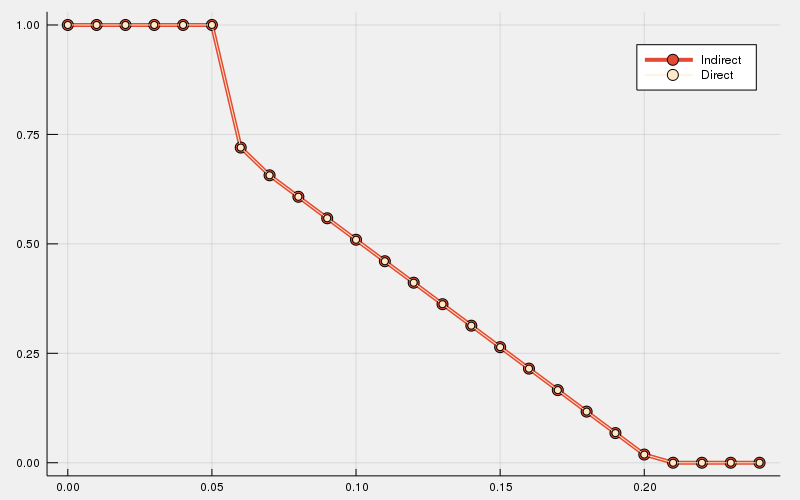

In [6]:
j = 11
clibrary(:Plots)
gr(size=(800,500), html_output_format=:png, 
    seriescolor=:magma,  background_color_legend=:white, 
    background=RGB(((240,240,240) ./ 255.)...));
plot(traj_indirect[6],traj_indirect[7][j,:],label="Indirect",seriescolor=RGB(((227,74,51) ./ 255.)...),linewidth=4,marker=6)
plot!(traj_direct[6],traj_direct[7][j,:],label="Direct",seriescolor=RGB(((254,232,200) ./ 255.)...),linewidth=0,marker=4)

In [ ]:
@benchmark Bilevel.simulate(sim_data_indirect, ctrl!, x0, N)

In [ ]:
@benchmark Bilevel.simulate(sim_data_direct, ctrl!, x0, N)

# Tuning Lower Solver

In [ ]:
# tuning the lower level solver
q0 = [1., 0., 0., 0., 0., 0., 0.]
v0 = [0., 0., 0., 0., 0.1, 0.]
u0 = zeros(6)
eval_cons = generate_solver_fn_sim_direct(sim_data,q0,v0,u0)
sim_data.lower_options["num_fosteps"] = 3
sim_data.lower_options["num_sosteps"] = 2
sim_data.lower_options["c"] = 1.
sim_data.lower_options["c_fos"] = 10.
sim_data.lower_options["c_sos"] = 10.
x = vcat(q0,v0,[1.])
eval_cons(x);

# Trajectory Optimization

In [31]:
q1 = [1., 0., 0., 0., 0., 0., 0.]
v1 = [0., 0., 0., 0., 0., 0.]
qN = [1., 0., 0., 0., 10., 0., 0.]
vN = [0., 0., 0., 0., 0., 0.]
N = 10
Δt = .01

sim_data_indirect = get_trajopt_data_indirect(mechanism,env,Δt,N,relax_comp=false)

# adding user defined constraint
add_eq!(sim_data_indirect, :cq1, length(q1), x -> sim_data_indirect.vs(x, :q1) - q1)
add_eq!(sim_data_indirect, :cv1, length(v1), x -> sim_data_indirect.vs(x, :v1) - v1)
add_eq!(sim_data_indirect, :cqN, length(qN), x -> sim_data_indirect.vs(x, Symbol("q",N)) - qN)
add_eq!(sim_data_indirect, :cvN, length(vN), x -> sim_data_indirect.vs(x, Symbol("v",N)) - vN)

for n=1:N
    add_obj!(sim_data_indirect, Symbol("objv", n), x -> norm(sim_data_indirect.vs(x, Symbol("v", n))))
end

for n=1:N-1
    add_obj!(sim_data_indirect, Symbol("obju", n), x -> norm(sim_data_indirect.vs(x, Symbol("u", n))))
end

In [ ]:
traj_indirect = Bilevel.trajopt(sim_data_indirect, verbose=1)

In [ ]:
traj_indirect[7][5,:]